In [22]:
# Import Required Liabraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load Data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [24]:
# EDA
# Display the first few rows of the training data
print(train_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [25]:
# Summary statistics for numerical features
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [26]:
# Summary of categorical features
print(train_data.describe(include=['O']))


                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644


In [27]:
# Check for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


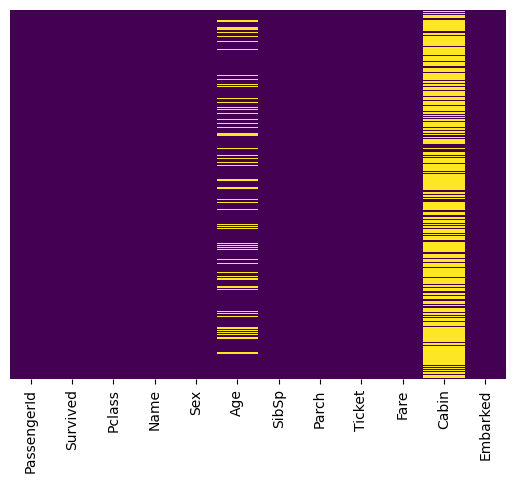

In [28]:
# Visualize missing data
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

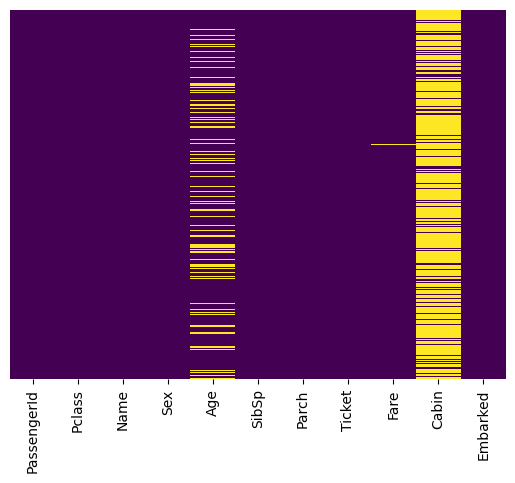

In [29]:
# Visualize missing data
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

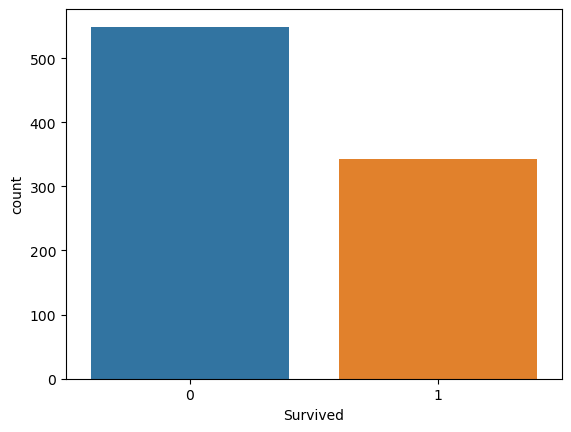

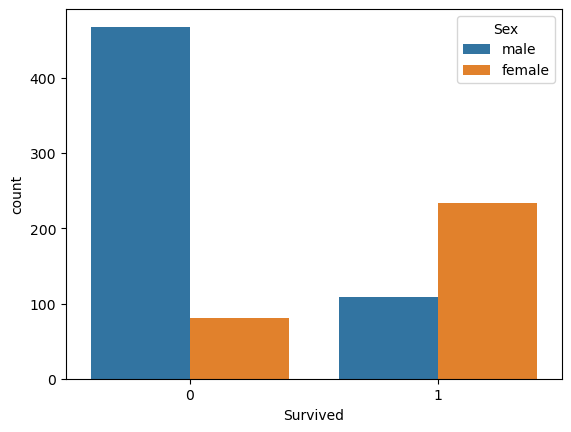

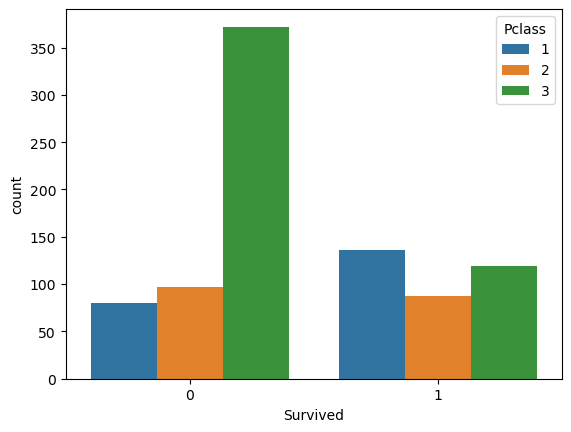

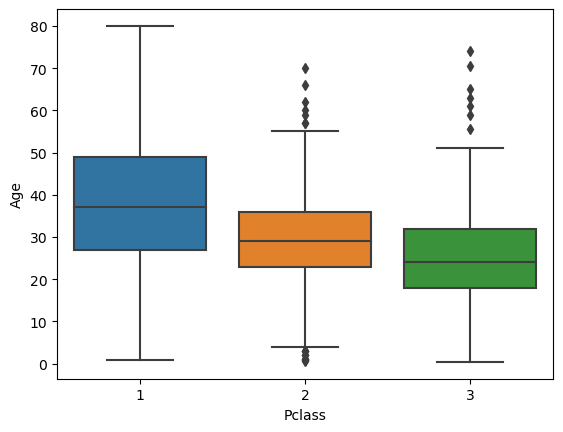

In [30]:
# Exploring data with plots 0 = No, 1 = yes
sns.countplot(x='Survived', data=train_data)
plt.show()

sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.show()

sns.boxplot(x='Pclass', y='Age', data=train_data)
plt.show()

In [31]:
# DATA PREPROCESSING
# Fill missing 'Age' values with the median age of corresponding Pclass
train_data['Age'] = train_data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
test_data['Age'] = test_data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))


In [32]:
# Fill missing 'Embarked' with the mode as Categorical 
mode_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(mode_embarked, inplace=True)
test_data['Embarked'].fillna(mode_embarked, inplace=True)

In [33]:
# Convert categorical variables into dummy variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)


In [34]:
print (train_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ... 

In [35]:
# Fill missing 'Fare' in test data with the median fare of the corresponding Pclass
test_data['Fare'].fillna(test_data.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [36]:
#MODEL BUILDING
# Feature selection
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = train_data[features]
y = train_data['Survived']

In [37]:
# Split data into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)


In [38]:
# Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [39]:
#MODEL PREDICTION 
# Make predictions on the validation set
predictions = model.predict(X_valid)
accuracy = accuracy_score(y_valid, predictions)
print(f"Validation accuracy: {accuracy:.2f}")

Validation accuracy: 0.83


In [40]:
# Predict on the test set
test_predictions = model.predict(test_data[features])

# Prepare submission file
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_predictions})
output.to_csv('submission.csv', index=False)


In [41]:
# MORE METRICS FOR VALIDATION
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix 
conf_matrix = confusion_matrix(y_valid, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[103   7]
 [ 23  46]]


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_valid, predictions)
recall = recall_score(y_valid, predictions)
f1 = f1_score(y_valid, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.87
Recall: 0.67
F1-score: 0.75
